In [1]:
'''
    @Author Xiaoxin Gan
    @Description Plotting
'''

import pandas as pd
import matplotlib.pyplot as plt

FILE_PATH = '../MainFlow/statistics.txt'


In [2]:
df = pd.read_csv(FILE_PATH,header=None,sep=' ')
df = df.drop(columns=[7])
columns = ['Susceptible','Presymptomatic','Asymptomatic','Mild','Severe','Recovered','Dead']
df.columns = columns
df

,Susceptible,Presymptomatic,Asymptomatic,Mild,Severe,Recovered,Dead
0,9990,10,0,0,0,0,0
1,9989,11,0,0,0,0,0
2,9987,13,0,0,0,0,0
3,9979,19,2,0,0,0,0
4,9925,60,15,0,0,0,0
...,...,...,...,...,...,...,...
115,5460,0,0,1,0,4299,240
116,5460,0,0,1,0,4299,240
117,5460,0,0,1,0,4299,240
118,5460,0,0,0,1,4299,240


## 1 Overall Statistics

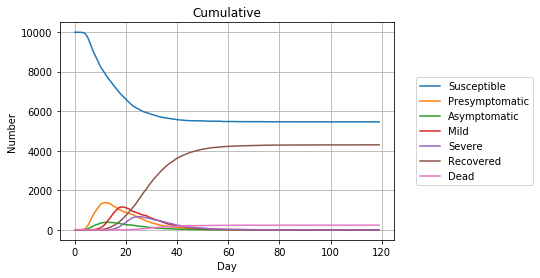

In [3]:
for column in columns:
    plt.plot(df.index, df[column],label = column)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          ncol=1, fancybox=True)
plt.title('Cumulative')
plt.xlabel('Day')
plt.ylabel('Number')
plt.grid()
plt.show()

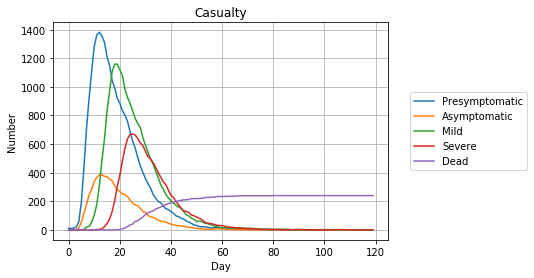

In [8]:
for column in columns:
    if column is 'Susceptible' or column is 'Recovered':
        pass
    else:
        plt.plot(df.index, df[column],label = column)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          ncol=1, fancybox=True)
plt.title('Casualty')
plt.xlabel('Day')
plt.ylabel('Number')
plt.grid()
plt.show()

## 2 Daily/Cumulative Diagnosis Cases

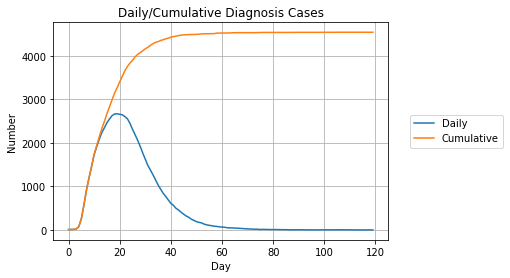

In [5]:
df['Daily number of existing cases'] = df['Presymptomatic'] + df['Asymptomatic'] + df['Mild'] + df['Severe']
df['Cumulative diagnosis'] = df['Presymptomatic'] + df['Asymptomatic'] + df['Mild'] + df['Severe'] + df['Recovered'] + df['Dead']
plt.plot(df.index, df['Daily number of existing cases'],label='Daily')
plt.plot(df.index, df['Cumulative diagnosis'],label='Cumulative')
plt.title('Daily/Cumulative Diagnosis Cases')
plt.xlabel('Day')
plt.ylabel('Number')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          ncol=1, fancybox=True)
plt.grid()
plt.show()

## 3 Daily/Cumulative Deadths

In [6]:
df['dead growth'] = df['Presymptomatic'] + df['Asymptomatic'] + df['Mild'] + df['Severe']

# shift one day
df['dead growth'] = df['Dead'].shift()

# the next day - now day
df['dead growth'] = df['Dead'] - df['dead growth']
df.loc[0,'dead growth'] = df.loc[0,'Dead']

# change the negative value to zero
df.loc[df['dead growth'] < 0, 'dead growth'] = 0

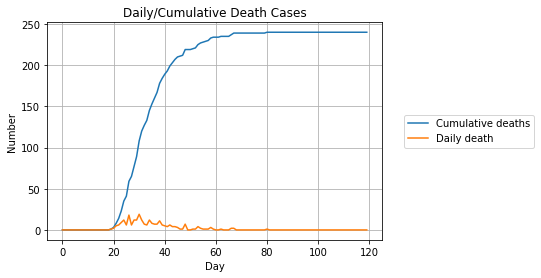

In [7]:
plt.plot(df.index, df['Dead'], label='Cumulative deaths')
plt.plot(df.index, df['dead growth'], label='Daily death')
plt.title('Daily/Cumulative Death Cases')
plt.xlabel('Day')
plt.ylabel('Number')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          ncol=1, fancybox=True)
plt.grid()
plt.show()